In [5]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [7]:
# data gathering
all_data = pd.read_csv('../dataset/AUS_Classification.csv', sep=',', encoding='utf-8')
label = all_data['DEP_DEL15']
all_data = all_data.drop(['DEP_DEL15'], axis=1)
all_data = all_data.drop(['DEP_DELAY'], axis=1)
all_data = all_data.drop(['DEP_TIME'], axis=1)
all_data = all_data.drop(['DEP_DELAY_GROUP'], axis=1)
all_data = all_data.drop(['Unnamed: 0'], axis=1)
all_data = all_data.drop(['ARR_DEL15'], axis=1)
all_data = all_data.drop(['ARR_DELAY'], axis=1)
all_data = all_data.drop(['ARR_TIME'], axis=1)
all_data = all_data.drop(['ARR_DELAY_GROUP'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(all_data, label, test_size=0.25, random_state=42)

Accuracy: 0.9119123267486301
[1. 0. 1. ... 0. 0. 0.]


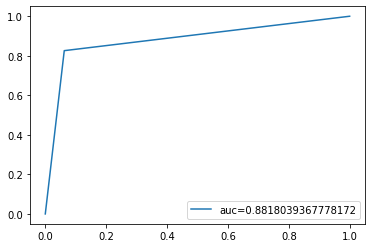

[[15667  1041]
 [  872  4137]]
[0.02117006 0.05909131 0.02841284 0.00571275 0.01814083 0.
 0.00642242 0.02091873 0.01608449 0.01841193 0.06418392 0.00483039
 0.00122563 0.22052451 0.01758413 0.02508598 0.00319023 0.46900985]
['MONTH' 'DAY_OF_MONTH' 'DAY_OF_WEEK' 'MKT_CARRIER_AIRLINE_ID'
 'OP_CARRIER_FL_NUM' 'ORIGIN_AIRPORT_SEQ_ID' 'DEST_AIRPORT_SEQ_ID'
 'CRS_DEP_TIME' 'CRS_ARR_TIME' 'CRS_ELAPSED_TIME' 'ACTUAL_ELAPSED_TIME'
 'DISTANCE' 'DISTANCE_GROUP' 'CARRIER_DELAY' 'WEATHER_DELAY' 'NAS_DELAY'
 'SECURITY_DELAY' 'LATE_AIRCRAFT_DELAY']


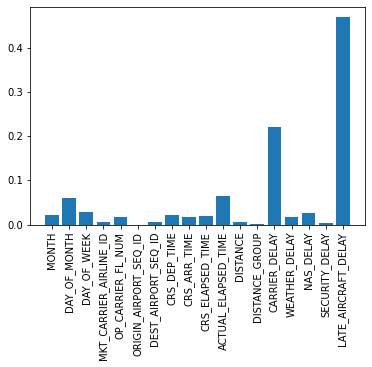

In [22]:
# Trees

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[::,1]
print(y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

print(confusion_matrix(y_test, y_pred))
print(clf.feature_importances_)
print(clf.feature_names_in_)

plt.bar(clf.feature_names_in_, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.7712851683013308
[0.26003851 0.12140226 0.20250295 ... 0.12343414 0.2315364  0.26668281]


C:\Users\neele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


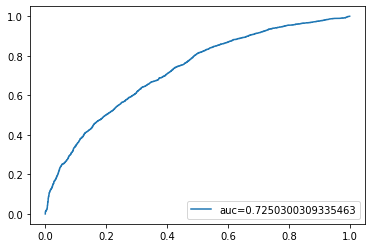

[[16640    68]
 [ 4899   110]]
[[ 1.35284802e-05 -1.46743402e-06  1.54498805e-05 -5.56136663e-04
   3.15830937e-05  8.46629670e-06 -2.34474020e-07  1.14618976e-03
  -3.43018202e-04 -3.92866722e-05 -8.26120429e-06  1.18423642e-04
  -2.79008680e-06  2.10677854e-03  1.97343159e-04  3.89104728e-04
   1.85092679e-05  2.53569333e-03]]
['MONTH' 'DAY_OF_MONTH' 'DAY_OF_WEEK' 'MKT_CARRIER_AIRLINE_ID'
 'OP_CARRIER_FL_NUM' 'ORIGIN_AIRPORT_SEQ_ID' 'DEST_AIRPORT_SEQ_ID'
 'CRS_DEP_TIME' 'CRS_ARR_TIME' 'CRS_ELAPSED_TIME' 'ACTUAL_ELAPSED_TIME'
 'DISTANCE' 'DISTANCE_GROUP' 'CARRIER_DELAY' 'WEATHER_DELAY' 'NAS_DELAY'
 'SECURITY_DELAY' 'LATE_AIRCRAFT_DELAY']


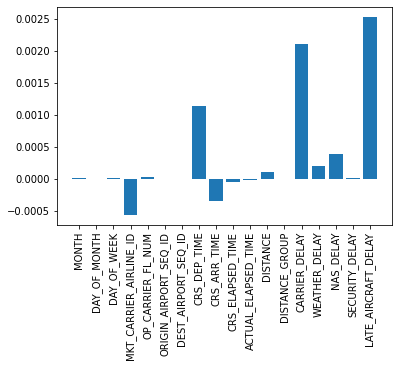

In [23]:
# Logistic Regression

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[::,1]
print(y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

print(confusion_matrix(y_test, y_pred))
print(clf.coef_)
print(clf.feature_names_in_)
plt.bar(clf.feature_names_in_, clf.coef_[0])
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.846525763226965
[1.00000000e+000 0.00000000e+000 3.64665142e-206 ... 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


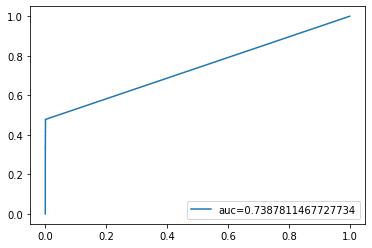

[[16704     4]
 [ 3329  1680]]
[array([[-1.78307667e-091,  2.16732148e-235, -1.47937781e-315, ...,
         8.53945276e-316,  2.27774116e-315, -4.65049687e-042],
       [-6.49204898e-068,  8.82106302e-250, -3.61081604e-315, ...,
        -4.09439000e-315, -1.38632713e-315, -2.02899199e-023],
       [ 9.46837013e-123,  1.26080895e-313,  4.42117250e-315, ...,
        -2.03330553e-316,  1.87226796e-315, -1.28202124e-062],
       ...,
       [ 3.91089918e-315, -2.62981775e-315,  2.53259033e-315, ...,
        -2.00663268e-315, -5.30722204e-316,  1.07776881e-072],
       [-1.04014781e-316,  2.20241164e-315, -1.71954849e-315, ...,
        -3.53634307e-315, -3.90447661e-315,  2.69214812e-315],
       [-4.35909233e-315, -4.26602077e-315, -2.33445853e-315, ...,
        -4.44502347e-315, -4.26400655e-315, -8.16738688e-019]]), array([[-1.60250662e-178],
       [-1.36191727e-186],
       [ 1.38427112e-315],
       [-1.97062751e-315],
       [-4.50640576e-316],
       [ 3.19984622e-033],
       [ 1.2

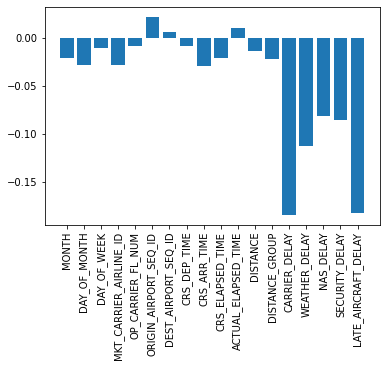

In [26]:
# MLP

clf = MLPClassifier(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[::,1]
print(y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

print(confusion_matrix(y_test, y_pred))
print(clf.coefs_)
print(clf.n_layers_)
print(clf.feature_names_in_)
plt.bar(clf.feature_names_in_, clf.coefs_[0].mean(axis=1))
plt.xticks(rotation=90)
plt.show()